<a href="https://colab.research.google.com/github/kronze1996/Capstone-Project-1/blob/main/Kartikey_Sharma_Team_7_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. </b>

## <b> Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.</b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [124]:
from collections import Counter 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.axes as ax
%matplotlib inline

In [3]:
working_dir_path = '/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/Data/'

EdStatsData_df = pd.read_csv(working_dir_path + 'Copy of EdStatsData.csv')
CountrySeries_df = pd.read_csv(working_dir_path + 'Copy of EdStatsCountry-Series.csv')
EdStatSeries_df = pd.read_csv(working_dir_path + 'Copy of EdStatsSeries.csv')
EdStatsCountry_df = pd.read_csv(working_dir_path + 'Copy of EdStatsCountry.csv')
EdStatsFootNote_df = pd.read_csv(working_dir_path + 'Copy of EdStatsFootNote.csv')

#0. Dropping unnamed and empty columns :

In [4]:
EdStatsData_df.drop(['Unnamed: 69'],axis=1,inplace=True)
CountrySeries_df.drop(['Unnamed: 3'],axis=1,inplace=True)
EdStatSeries_df.drop(['Unnamed: 20','License Type','Related indicators','Other web links'],axis=1,inplace=True)
EdStatsCountry_df.drop(['Unnamed: 31'],axis=1,inplace=True)
EdStatsFootNote_df.drop(['Unnamed: 4'],axis=1,inplace=True)

#Implementations :

In [132]:
#Comparing Countries based on indicators data:
countryComparision_df=EdStatsData_df[(EdStatsData_df['Indicator Code']=='SE.PRM.TENR') & ((EdStatsData_df['Country Name'] =='Nepal') | (EdStatsData_df['Country Name'] =='Arab World'))].reset_index()
countryComparision_df

#limited indicators (Top 10)
#Top 5 countries (USA,INDIA,CHINA,RUSSIA,)
#2010 - 2015 (Years)
#Analyses 
#Correlation between indicators 


,index,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.245140,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,597399,Nepal,NPL,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.324440,72.611870,NaN,NaN,80.401802,81.085640,NaN,NaN,NaN,NaN,NaN,NaN,98.635094,99.579483,NaN,94.661530,97.126549,97.107803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


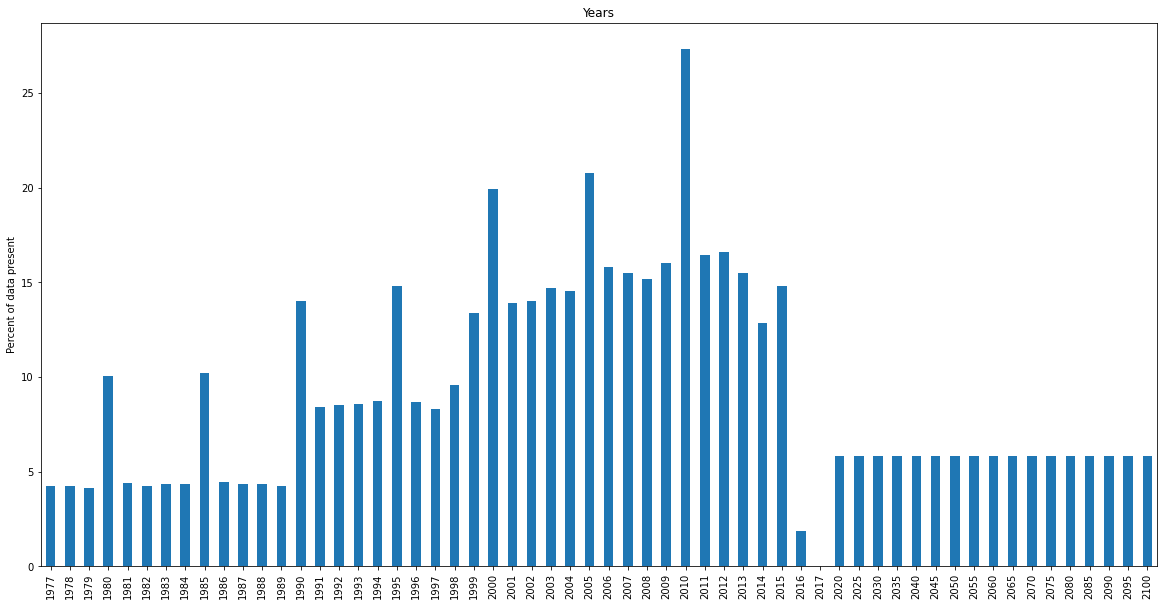

In [29]:
#Data Present in Years


EdStats = (EdStatsData_df.loc[:,'1977':'2100'].notnull().sum()/len(EdStatsData_df))*100
plt.figure(figsize=(20,10))
plt.subplot()
EdStats.plot(kind='bar')
plt.title('Years')
plt.ylabel('Percent of data present')
plt.show()

In [6]:
#fetching columns:
Cols = list(countryComparision_df.columns)

In [7]:
for i in range(len(Cols)):
  if i >34 and i<51:
    print(Cols[i])

2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015


In [191]:
# Capturing Top 5 Indicator names :

indicator_counts= dict(Counter(EdStatsData_df['Indicator Name']))
indicator_names = sorted(set(indicator_counts.keys()))
indicator_names
for i in range(len(indicator_names)):
  if "Total" in indicator_names[i] and "UIS" not in indicator_names[i] and "Dataset" not in indicator_names[i]:
    print(indicator_names[i])


# EdStats[EdStats["Indicator Name"]==]
# Adjusted net enrolment rate, lower secondary, both sexes (%)
# Adjusted net enrolment rate, primary, both sexes (%)
# Adjusted net enrolment rate, upper secondary, both sexes (%)
# Adult illiterate population, 15+ years, both sexes (number)
# Adult literacy rate, population 15+ years, both sexes (%)

Barro-Lee: Percentage of female population age 15+ with primary schooling. Total (Incomplete and Completed Primary)
Barro-Lee: Percentage of female population age 15+ with secondary schooling. Total (Incomplete and Completed Secondary)
Barro-Lee: Percentage of female population age 15+ with tertiary schooling. Total (Incomplete and Completed Tertiary)
Barro-Lee: Percentage of female population age 15-19 with primary schooling. Total (Incomplete and Completed Primary)
Barro-Lee: Percentage of female population age 15-19 with secondary schooling. Total (Incomplete and Completed Secondary)
Barro-Lee: Percentage of female population age 15-19 with tertiary schooling. Total (Incomplete and Completed Tertiary)
Barro-Lee: Percentage of female population age 20-24 with primary schooling. Total (Incomplete and Completed Primary)
Barro-Lee: Percentage of female population age 20-24 with secondary schooling. Total (Incomplete and Completed Secondary)
Barro-Lee: Percentage of female population age

In [138]:
#Calculating mean for all Data

country1_df=EdStatsData_df[(EdStatsData_df['Country Name'] =='India' )  & (EdStatsData_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[Cols[i] for i in range(len(Cols)) if i >3 ]].mean().dropna().to_frame()


# (EdStatsData_df[(EdStatsData_df['Country Name'] =='Zimbabwe' )  & (EdStatsData_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[countryCols[i] for i in range(len(countryCols)) if i>3 ]].median().dropna()).mean()

In [140]:
country2_df=EdStatsData_df[(EdStatsData_df['Country Name'] =='Zimbabwe' )  & (EdStatsData_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[Cols[i] for i in range(len(Cols)) if i >3]].mean().dropna().to_frame()
country3_df=EdStatsData_df[(EdStatsData_df['Country Name'] =='Arab' )  & (EdStatsData_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[Cols[i] for i in range(len(Cols)) if i>3 ]].mean().dropna().to_frame()
country4_df=EdStatsData_df[(EdStatsData_df['Country Code'] =='BHR' )  & (EdStatsData_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[Cols[i] for i in range(len(Cols)) if i>3 ]].mean().dropna().to_frame()
country5_df=EdStatsData_df[(EdStatsData_df['Country Code'] =='BLZ' )  & (EdStatsData_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[Cols[i] for i in range(len(Cols)) if i>3 ]].mean().dropna().to_frame()


Text(0.5, 0, 'Series Code')

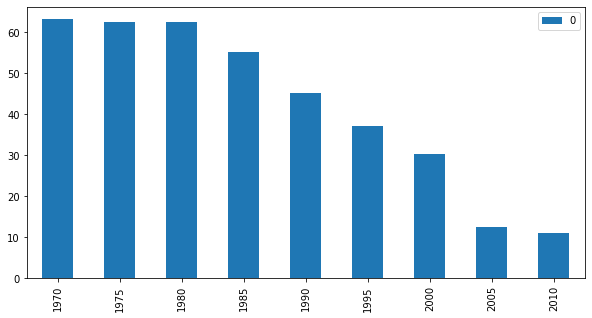

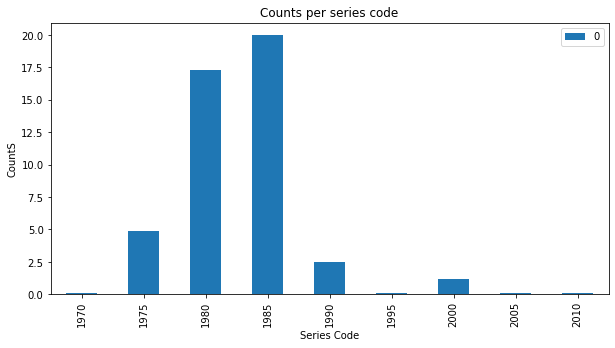

In [141]:
#Meadian Value graph printed for Country India and Zimbabwe

plt.rcParams['figure.figsize'] = (10, 5)
country1_df.plot(kind='bar')
country2_df.plot(kind='bar')

plt.title('Counts per series code')
plt.ylabel('CountS')
plt.xlabel('Series Code')

Text(0.5, 0, 'Series Code')

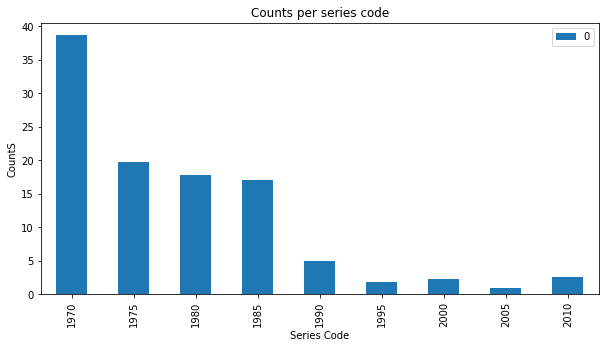

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
# country3_df.plot(kind='bar')
country4_df.plot(kind='bar')
plt.title('Counts per series code')
plt.ylabel('CountS')
plt.xlabel('Series Code')

# country5_df.plot(kind='bar')


In [37]:
#fetching country codes:
CountryName=set()
for i in EdStatsData_df['Country Name']:
  CountryName.add(i)
CountryName

{'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Arab World',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',


In [188]:
# Plotting in graph of country with max data :
CN=list(CountryName)
length=[]
countries=[]
  
for i in range(len(CountryName)):
  countryComparision_df=EdStatsData_df[(EdStatsData_df['Country Name'] == CN[i])][[Cols[i] for i in range(len(Cols)) if i >34 and i<51 ]].reset_index()
  EdStats=(countryComparision_df.count(axis=1))
  for i in range(len(EdStats)):
    length.append(EdStats[i])
  countries.append((sum(length)/(3665*22*242)*100))


In [184]:
countrydatapercent=zip(CountryName,countries)

In [185]:
list(countrydatapercent)

[('Lao PDR', 0.09494446112894017),
 ('World', 0.143800422909259),
 ('Ghana', 0.23625416784967143),
 ('Grenada', 0.29479624814093147),
 ('Belize', 0.38236593438244076),
 ('Trinidad and Tobago', 0.45127574893170824),
 ('Korea, Rep.', 0.542719882577594),
 ('South Asia', 0.5871222798150515),
 ('Bhutan', 0.6598245428818303),
 ('Togo', 0.7393942127235623),
 ('Lebanon', 0.8245910561764124),
 ('San Marino', 0.8536647865005232),
 ('Chile', 0.9397174933350281),
 ('Greece', 1.0231462357898493),
 ('Kazakhstan', 1.1110285427875315),
 ('Kosovo', 1.1319485087989931),
 ('Bolivia', 1.2140652690639724),
 ('Turkey', 1.3045715404413385),
 ('Austria', 1.3953904325748778),
 ('France', 1.4869678144119194),
 ('Estonia', 1.5815586553412537),
 ('Cabo Verde', 1.6621738109905158),
 ('Rwanda', 1.7387300217399548),
 ('Malaysia', 1.8210825288046715),
 ('Netherlands', 1.9086778396983262),
 ('Tunisia', 1.9916760879971054),
 ('Bahrain', 2.069841526901272),
 ('Bermuda', 2.115755778615305),
 ('El Salvador', 2.21092061175

In [186]:
data=dict(countrydatapercent)
k =data.keys()
v =data.values()



In [187]:
k
# plt.figure(figsize=(35,10))
# plt.subplot()
# plt.xticks(rotation=90)
# plt.bar(k, v)
# plt.title("Countries Data present")

dict_keys([])

In [172]:
a=Counter(dict(countrydatapercent)).most_common(5)

In [ ]:
#fetching indicator codes
indicator_counts= dict(Counter(EdStatsData_df['Indicator Name']))
indicator_names = sorted(set(indicator_counts.keys()))
indicator_names


NameError: ignored

In [ ]:
medians=[]

In [ ]:
#Fetching median for all indicators and storing in a new df:
MedianYearEdStats_df=EdStatsData_df[["Indicator Name","Country Name","Country Code","Indicator Code"]]

for j in range(len(indicator_names)):
  for i in range(len(CountryCodes)):
    medians.append((EdStatsData_df[(EdStatsData_df['Country Code'] == CountryCodes[i] )  & (EdStatsData_df['Indicator Code']== indicator_names[j] )] [[Cols[i] for i in range(len(Cols)) if i >34 and i<51 ]].median().dropna()).mean())


KeyboardInterrupt: ignored

In [ ]:
medians

[nan,
 81.24222222222221,
 nan,
 5.7666666666666675,
 nan,
 nan,
 29.11,
 1.2822222222222222,
 3.083333333333334,
 nan,
 nan,
 0.8799999999999999,
 0.8533333333333334,
 nan,
 60.580000000000005,
 2.1877777777777774,
 63.85888888888889,
 nan,
 46.556666666666665,
 2.29,
 11.731111111111112,
 nan,
 nan,
 nan,
 2.396666666666667,
 nan,
 10.30888888888889,
 10.046666666666665,
 1.0111111111111108,
 18.13111111111111,
 nan,
 11.075555555555557,
 67.00888888888889,
 0.29333333333333333,
 16.162222222222223,
 nan,
 1.5166666666666668,
 3.505555555555555,
 52.678888888888885,
 34.84777777777778,
 47.01333333333334,
 12.114444444444445,
 4.69,
 nan,
 nan,
 2.232222222222222,
 1.3544444444444443,
 nan,
 nan,
 5.235555555555555,
 0.4677777777777778,
 24.081111111111113,
 nan,
 nan,
 0.16555555555555557,
 11.231111111111112,
 32.114444444444445,
 nan,
 nan,
 nan,
 nan,
 8.831111111111111,
 37.150000000000006,
 nan,
 nan,
 5.808888888888889,
 1.0899999999999999,
 nan,
 nan,
 0.6,
 2.61,
 0.55888888

In [ ]:
MedianYearEdStats_df.loc[(MedianYearEdStats_df['Country Code'] == CountryCodes[i] )  & (MedianYearEdStats_df['Indicator Code']== indicator_names[j] )]["Mean Year"]=medians

,Indicator Name,Country Name,Country Code,Indicator Code
0,"Adjusted net enrolment rate, lower secondary, ...",Arab World,ARB,UIS.NERA.2
1,"Adjusted net enrolment rate, lower secondary, ...",Arab World,ARB,UIS.NERA.2.F
2,"Adjusted net enrolment rate, lower secondary, ...",Arab World,ARB,UIS.NERA.2.GPI
3,"Adjusted net enrolment rate, lower secondary, ...",Arab World,ARB,UIS.NERA.2.M
4,"Adjusted net enrolment rate, primary, both sex...",Arab World,ARB,SE.PRM.TENR
...,...,...,...,...
886925,"Youth illiterate population, 15-24 years, male...",Zimbabwe,ZWE,UIS.LP.AG15T24.M
886926,"Youth literacy rate, population 15-24 years, b...",Zimbabwe,ZWE,SE.ADT.1524.LT.ZS
886927,"Youth literacy rate, population 15-24 years, f...",Zimbabwe,ZWE,SE.ADT.1524.LT.FE.ZS
886928,"Youth literacy rate, population 15-24 years, g...",Zimbabwe,ZWE,SE.ADT.1524.LT.FM.ZS


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#1. EdStats Data :

In [ ]:
EdStatsData_df[(EdStatsData_df["Country Code"]==(i for i in )) and (EdStatsData_df["Indicator Code"]=="UIS.NERA.2") ]['2010'].median()

84.93558883666995

In [ ]:

#fetching columns of country :
countryCols = list(countryComparision_df.columns)


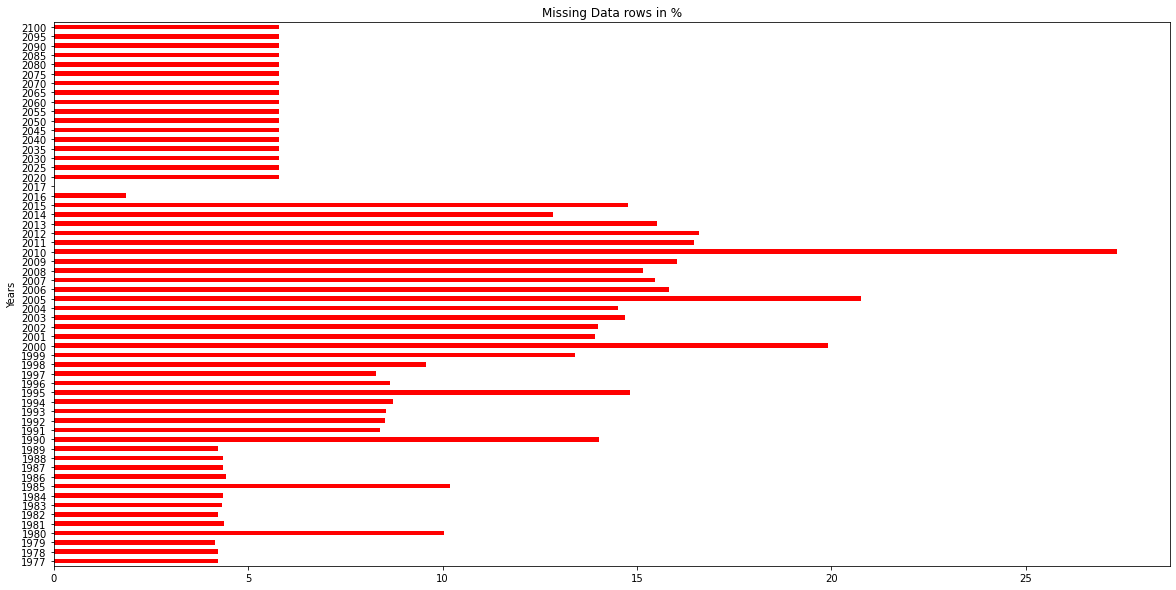

In [23]:
dataset1 = EdStatsData_df.loc[:,'1977':'2100'].notnull().sum()/len(EdStatsData_df)*100
plt.figure(figsize=(20,10))
plt.subplot()
dataset1.plot(kind='barh', color='red')
plt.title('Missing Data rows in %')
plt.ylabel('Years')
plt.show()

In [ ]:
#Country Wise Bar Graph for one indicator

EdStatsData_df[(EdStatsData_df['Country Name'] =='India' )  & (EdStatsData_df['Indicator Code']== 'BAR.NOED.1519.FE.ZS' )] [[Cols[i] for i in range(len(Cols)) if i>3 ]].mean().dropna()

1970    63.10
1975    62.36
1980    62.50
1985    55.22
1990    45.11
1995    37.21
2000    30.22
2005    12.62
2010    11.09
dtype: float64

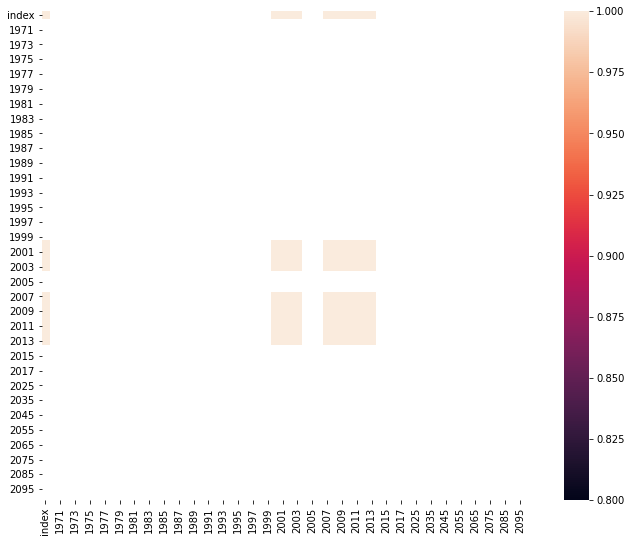

In [ ]:
corrmat=countryComparision_df[""].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [190]:
grouped=EdStatsData_df.groupby(['Indicator Name','Country Name']).first().reset_index()
# YearlyCountryStats_df=grouped.to_frame().reset_index()
# YearlyCountryStats_df.head()
#All indicators for one country :
grouped[grouped['Country Name']=='Nepal']

,Indicator Name,Country Name,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
156,"Adjusted net enrolment rate, lower secondary, ...",Nepal,NPL,UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.813290,44.337891,NaN,35.704342,43.178299,46.130859,51.864101,54.402691,55.150131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,"Adjusted net enrolment rate, lower secondary, ...",Nepal,NPL,UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.226582,44.941002,NaN,35.422729,42.492222,45.591648,51.854771,56.054459,56.685848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
640,"Adjusted net enrolment rate, lower secondary, ...",Nepal,NPL,UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.826870,1.027190,NaN,0.984640,0.969380,0.977440,0.999650,1.060890,1.055690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
882,"Adjusted net enrolment rate, lower secondary, ...",Nepal,NPL,UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.277679,43.751389,NaN,35.975281,43.834450,46.644100,51.872952,52.837349,53.695530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1124,"Adjusted net enrolment rate, primary, both sex...",Nepal,NPL,SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.32444,72.61187,NaN,NaN,80.401802,81.08564,NaN,NaN,NaN,NaN,NaN,NaN,98.635094,99.579483,NaN,94.661530,97.126549,97.107803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885876,"Youth illiterate population, 15-24 years, male...",Nepal,NPL,UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,806983.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,591388.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,439685.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,257655.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886118,"Youth literacy rate, population 15-24 years, b...",Nepal,NPL,SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.038450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.603722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.05362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.757150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886360,"Youth literacy rate, population 15-24 years, f...",Nepal,NPL,SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.966610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.666439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.14379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.206830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886602,"Youth literacy rate, population 15-24 years, g...",Nepal,NPL,SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.331880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.478770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.74605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.892340,NaN

In [ ]:

# EdStatsData_df[['Country Name','Country Code','Indicator Code','1970'	,'1971'	,'1972'	,'1973',	'1974',	'1975'	,'1976',	'1977',	'1978'	,'1979'	,'1980']].tail(20)
# sample=EdStatsData_df.groupby("Indicator Code")

# Capturing Country names


#2. Country Series Data :

In [ ]:
CountrySeries_df.info()
#Contains repeated data....

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryCode  613 non-null    object
 1   SeriesCode   613 non-null    object
 2   DESCRIPTION  613 non-null    object
dtypes: object(3)
memory usage: 14.5+ KB


In [ ]:
CountrySeries_df.groupby("SeriesCode").first().reset_index()

,SeriesCode,CountryCode,DESCRIPTION
0,NY.GDP.MKTP.PP.CD,AFG,Estimates are based on regression.
1,NY.GDP.MKTP.PP.KD,AFG,Estimates are based on regression.
2,NY.GDP.PCAP.CD,CYP,Data are for areas under the effective control...
3,NY.GDP.PCAP.KD,CYP,Data are for areas under the effective control...
4,NY.GDP.PCAP.PP.CD,AFG,Estimates are based on regression.
5,NY.GDP.PCAP.PP.KD,AFG,Estimates are based on regression.
6,NY.GNP.MKTP.PP.CD,AFG,Estimates are based on regression.
7,NY.GNP.PCAP.CD,CYP,Data are for areas under the effective control...
8,NY.GNP.PCAP.PP.CD,AFG,Estimates are based on regression.
9,SP.POP.0014.FE.IN,GEO,Derived using ratio of age group from WPP and ...


#3. EdStatSeries Data :

In [ ]:
EdStatSeries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [ ]:
EdStatSeries_df


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Secondary,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN


#4. EdStatsCountry Data :

In [ ]:
EdStatsCountry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 31 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [ ]:
EdStatsCountry_df['External debt Reporting status']

0              NaN
1           Actual
2           Actual
3           Actual
4              NaN
          ...     
236         Actual
237         Actual
238    Preliminary
239         Actual
240         Actual
Name: External debt Reporting status, Length: 241, dtype: object

#5. EdStatsFootNote Data :

In [ ]:
EdStatsFootNote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CountryCode  643638 non-null  object
 1   SeriesCode   643638 non-null  object
 2   Year         643638 non-null  object
 3   DESCRIPTION  643638 non-null  object
dtypes: object(4)
memory usage: 19.6+ MB


In [ ]:
EdStatsFootNote_df.groupby(["SeriesCode",'CountryCode']).first().reset_index()

,SeriesCode,CountryCode,Year,DESCRIPTION
0,IT.NET.USER.P2,ARE,YR1995,Internet Dial-up customers.
1,IT.NET.USER.P2,ARG,YR2011,Population aged 10+. Estimated based on survey...
2,IT.NET.USER.P2,ARM,YR2013,All population.
3,IT.NET.USER.P2,ATG,YR2011,Population age 5+. Census.
4,IT.NET.USER.P2,AUS,YR2011,Individuals aged 15 years and over
...,...,...,...,...
72981,se.ADT.1524.LT.MA.ZS,IMN,YR1990,Aggregation based on the country data for 1985...
72982,se.ADT.1524.LT.ZS,IMN,YR1980,Aggregation based on the country data for 1975...
72983,se.ADT.LITR.FE.ZS,IMN,YR2008,Aggregation based on the most recent country d...
72984,se.ADT.LITR.MA.ZS,IMN,YR2000,Aggregation based on the country data for 1995...


#Observation for data wrangling:
-Total 195 countries (242 given)
-

#Summary:
1. Fake Columns named (unamed) having zero data (Done) 